***using the dataset finding whether the person can affect by heart attact or not***

Cardiovascular diseases ***(CVDs) are the number 1 cause of death globally,*** taking an estimated ***17.9 million lives each year***, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need ***early detection*** and management ***wherein a machine learning model can be of great help.***

* Sex - Gender of patient 
Male = 1, Female =0

* Diabetes 
 0 = No, 1 = Yes

* Anaemia 
 0 = No, 1 = Yes

* High_blood_pressure 
 0 = No, 1 = Yes

* Smoking 
 0 = No, 1 = Yes
 
* DEATH_EVENT 
0 = No, 1 = Yes

***supervised learning - classification algorithm***

In [40]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression



In [41]:
Data=pd.read_csv("heart_failure.csv")

In [42]:
Data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [43]:
Data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [44]:
Data.shape

(299, 13)

In [45]:
Data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [47]:
Data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [48]:
Data.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
Data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [50]:
Data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [51]:
Data.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [52]:
Data.cov()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,141.486483,0.519335,-9.415915e+02,-0.593633,8.460237,0.530565,-6.090712e+04,1.958845,-2.412544,0.372120,0.103847,-206.861351,1.411454
anaemia,0.519335,0.246122,-9.181641e+01,-0.003120,0.185282,0.009057,-2.124536e+03,0.026777,0.091681,-0.022480,-0.024893,-5.445142,0.015376
creatinine_phosphokinase,-941.591531,-91.816413,9.414586e+05,-4.620581,-506.174452,-32.748805,2.321533e+06,-16.470382,254.956443,37.017261,1.098696,-703.803618,28.464468
diabetes,-0.593633,-0.003120,-4.620581e+00,0.244102,-0.028361,-0.003008,4.454928e+03,-0.024010,-0.195226,-0.037261,-0.034006,1.293259,-0.000449
ejection_fraction,8.460237,0.185282,-5.061745e+02,-0.028361,140.063455,0.138325,8.354524e+04,-0.138379,9.185787,-0.839667,-0.372573,38.330464,-1.486667
high_blood_pressure,0.530565,0.009057,-3.274880e+01,-0.003008,0.138325,0.228614,2.336480e+03,-0.002441,0.078292,-0.023916,-0.012458,-7.289904,0.017744
platelets,-60907.118586,-2124.535856,2.321533e+06,4454.928228,83545.241001,2336.480427,9.565669e+09,-4168.399498,26810.436905,-5851.104689,1291.447854,79811.066099,-2247.619159
serum_creatinine,1.958845,0.026777,-1.647038e+01,-0.024010,-0.138379,-0.002441,-4.168399e+03,1.070211,-0.863173,0.003448,-0.013263,-11.988935,0.142374
serum_sodium,-2.412544,0.091681,2.549564e+02,-0.195226,9.185787,0.078292,2.681044e+04,-0.863173,19.469956,-0.058158,0.009932,30.014152,-0.402819
sex,0.372120,-0.022480,3.701726e+01,-0.037261,-0.839667,-0.023916,-5.851105e+03,0.003448,-0.058158,0.228614,0.099706,-0.579224,-0.000965


In [53]:
Data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [54]:
Data.corr()["DEATH_EVENT"]

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

# Pie Charts

In [55]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = Data[Data['diabetes']==1]
diabetes_no = Data[Data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(title_text="Analysis on Diabetes")
fig.show()

In [56]:
fig=px.pie(Data,values='diabetes',names='DEATH_EVENT',title='Death Analysis')
fig.show()

# Heat Map


correlation map

<Axes: >

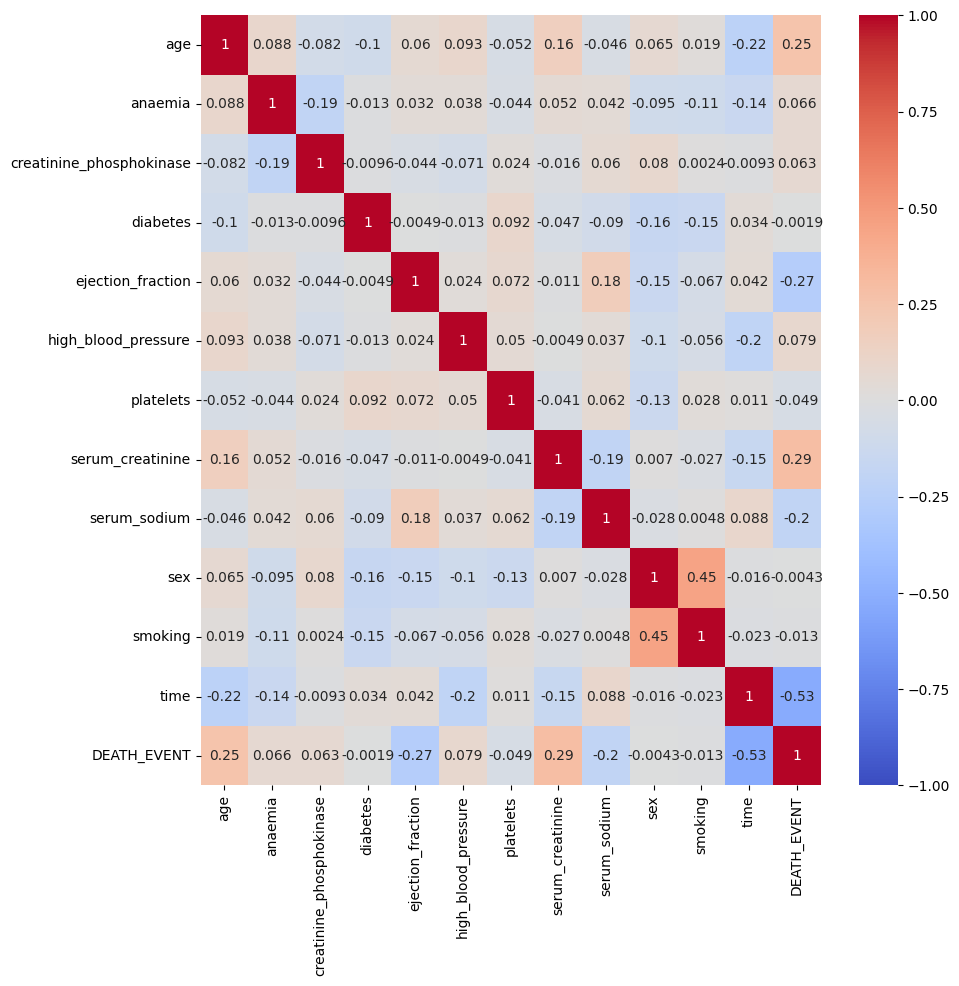

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),vmin=-1,cmap="coolwarm",annot=True)

# Data Modeling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [59]:
Feature=['time','ejection_fraction','serum_creatinine']
X=Data[Feature]
Y=Data["DEATH_EVENT"]

In [60]:
X

,time,ejection_fraction,serum_creatinine
0,4,20,1.9
1,6,38,1.1
2,7,20,1.3
3,7,20,1.9
4,8,20,2.7
...,...,...,...
294,270,38,1.1
295,271,38,1.2
296,278,60,0.8
297,280,38,1.4


In [61]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [63]:
xtrain

,time,ejection_fraction,serum_creatinine
53,44,50,1.0
172,146,60,1.1
23,22,60,0.8
98,85,25,1.2
244,213,38,1.8
...,...,...,...
75,73,20,0.7
22,20,35,0.9
72,72,35,1.0
15,13,50,1.3


In [64]:
ytrain

53     1
172    0
23     0
98     0
244    0
      ..
75     1
22     1
72     1
15     1
168    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [65]:
xtest

,time,ejection_fraction,serum_creatinine
179,147,40,0.70
221,200,50,1.10
226,205,25,1.30
7,10,60,1.10
173,146,20,0.80
30,27,38,1.83
183,162,38,2.50
181,150,25,1.00
271,244,40,0.90
141,109,35,0.90


In [66]:
ytest

179    0
221    0
226    0
7      1
173    0
30     1
183    1
181    1
271    0
141    0
13     1
272    0
35     1
270    0
77     0
267    0
206    0
94     0
91     0
214    0
3      1
104    0
29     1
170    0
134    0
41     1
251    0
288    0
133    0
160    0
152    0
66     1
243    0
237    0
89     0
273    0
157    0
103    0
126    1
222    0
11     1
224    0
164    1
127    0
174    0
74     1
188    0
239    0
283    0
156    0
131    0
99     0
10     1
84     1
142    0
65     1
118    0
282    0
109    0
205    0
Name: DEATH_EVENT, dtype: int64

In [67]:
xtrain.shape

(239, 3)

In [68]:
xtest.shape

(60, 3)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
Model_LR=LogisticRegression()

In [71]:
Model_LR.fit(xtrain,ytrain)


LogisticRegression()

In [72]:
prediction=Model_LR.predict(xtest)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [73]:
ytest

179    0
221    0
226    0
7      1
173    0
30     1
183    1
181    1
271    0
141    0
13     1
272    0
35     1
270    0
77     0
267    0
206    0
94     0
91     0
214    0
3      1
104    0
29     1
170    0
134    0
41     1
251    0
288    0
133    0
160    0
152    0
66     1
243    0
237    0
89     0
273    0
157    0
103    0
126    1
222    0
11     1
224    0
164    1
127    0
174    0
74     1
188    0
239    0
283    0
156    0
131    0
99     0
10     1
84     1
142    0
65     1
118    0
282    0
109    0
205    0
Name: DEATH_EVENT, dtype: int64

In [74]:
accuracy=accuracy_score(prediction,ytest)
accuracy

0.9

# confusion matrix

In [75]:
from mlxtend.plotting import plot_confusion_matrix

<Figure size 640x480 with 0 Axes>

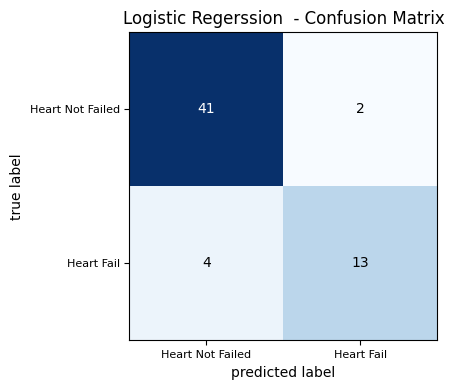

In [76]:
cm = confusion_matrix(ytest, prediction)
plt.figure()
plot_confusion_matrix(cm, figsize=(4,4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regerssion  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=8)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=8)
plt.show()